## What is the most optimal skill to learn for Data Analysts?
### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determining if certain technologies are more prevalent

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df = pd.read_csv(r'C:\Users\rsrcy\OneDrive\Desktop\ChayanPersonal\VSC\DA with Python\Python_JobPosting_Project\data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
df_DA_Ind_US = df[((df['job_country']=='India') | (df['job_country']=='United States')) & (df['job_title_short']=='Data Analyst')].copy()
df_DA_Ind_US = df_DA_Ind_US.dropna(subset=['salary_year_avg'])

In [23]:
df_DA_exp = df_DA_Ind_US.explode('job_skills')

df_DA_skill = df_DA_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skill = df_DA_skill.sort_values(by='count', ascending=False)

df_DA_skill = df_DA_skill.rename(columns={'count':'skill_count', 'median':'median_salary'})

In [28]:
df_DA_count = len(df_DA_Ind_US)
skill_limit = 4
df_DA_skill['skill_perct'] = df_DA_skill['skill_count']/df_DA_count * 100
df_DA_skill_high = df_DA_skill[df_DA_skill['skill_perct']>skill_limit]

df_DA_skill_high

,skill_count,median_salary,skill_perct
job_skills,,,
sql,2554,91000.000000,57.470747
excel,1847,84500.000000,41.561656
python,1467,97500.000000,33.010801
tableau,1384,93525.000000,31.143114
sas,928,90000.000000,20.882088
r,911,90612.601562,20.499550
power bi,855,90000.000000,19.239424
powerpoint,472,87500.000000,10.621062
word,471,81194.750000,10.598560


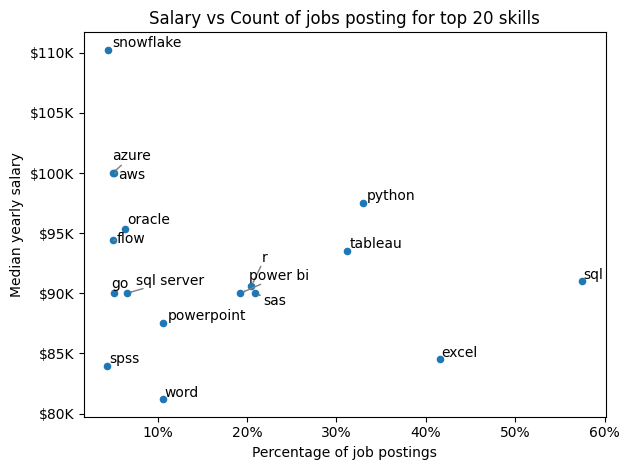

In [ ]:
df_DA_skill_high.plot(kind='scatter', x='skill_perct', y='median_salary')

texts=[]
for i,txt in enumerate(df_DA_skill_high.index):
    texts.append(plt.text(df_DA_skill_high['skill_perct'].iloc[i], df_DA_skill_high['median_salary'].iloc[i], txt))  

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percentage of job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs Count of jobs posting for top 20 skills')
plt.tight_layout()
plt.show()

In [44]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna() #series with row type str

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'esquisse',
  'tableau',
  'sharepoint',
  'ms access',
  'power bi',
  'alteryx',
  'splunk',
  'sas',
  'word',
  'powerpoint',
  'dax',
  'qlik',
  'spss',
  'sheets',
  'datarobot',
  'excel',
  'ssis',
  'nuix',
  'cognos',
  'ssrs',
  'msaccess',
  'powerbi',
  'sap',
  'visio',
  'outlook',
  'spreadsheet',
  'looker'],
 'programming': ['mongodb',
  'c++',
  'go',
  'matlab',
  'python',
  'bash',
  'html',
  'solidity',
  'fortran',
  'rust',
  'typescript',
  'f#',
  'dart',
  'ruby',
  'visualbasic',
  'crystal',
  'javascript',
  'julia',
  'shell',
  'assembly',
  'clojure',
  'lua',
  'nosql',
  'powershell',
  'scala',
  'sql',
  'sas',
  'delphi',
  'elixir',
  'groovy',
  'cobol',
  'vb.net',
  'visual basic',
  'css',
  'apl',
  'php',
  'java',
  'mongo',
  'objective-c',
  'kotlin',
  'c#',
  'c',
  'ocaml',
  'perl',
  'golang',
  'no-sql',
  'lisp',
  'erlang',
  'haskell',
  'pascal',
  'sass',
  't-sql',
  'r',
  'vba',
  'sw

In [45]:
df_tech = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')
df_tech

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,esquisse
0,analyst_tools,tableau
0,analyst_tools,sharepoint
0,analyst_tools,ms access
...,...,...
9,sync,rocketchat
9,sync,twilio
9,sync,wire
9,sync,slack


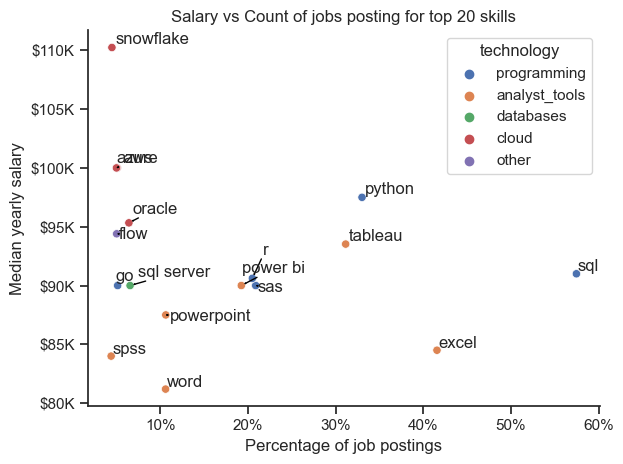

In [55]:
df_plot = df_DA_skill_high.merge(df_tech, left_on='job_skills', right_on='skills')

sns.scatterplot(
    data=df_plot,
    y= 'median_salary',
    x= 'skill_perct',
    hue= 'technology' 
)
sns.despine()
sns.set_theme(style='ticks')

texts=[]
for i,txt in enumerate(df_DA_skill_high.index):
    texts.append(plt.text(df_DA_skill_high['skill_perct'].iloc[i], df_DA_skill_high['median_salary'].iloc[i], txt))  

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percentage of job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs Count of jobs posting for top 20 skills')
plt.tight_layout()
plt.show()